Nomes:

Ada Maris Pereira Mário - 12725432

Amabile Pietrobon Ferreira - 13687196

Emanuel Victor da Silva Favorato - 12558151

#SME0816 - Questionário 3: Questão 3

Descreva um experimento com a aplicação em que o modelo com efeitos mistos (fixos e aleatórios) é adequado. Desenvolva uma aplicação com dados simulados. Apresente sua análise em um arquivo pdf com códigos em sua linguagem de preferência. Pode ser feito em grupo de até três alunos. Os nomes completos de todos os alunos devem constar no anexo e todos devem fazer a submissão.

##Descrição do Experimento (realizado abaixo)

Impacto do Aumento do Salário Mínimo no Emprego
Contexto: Um governo está interessado em avaliar o impacto de um aumento do salário mínimo nas taxas de emprego. O estudo coleta dados de várias empresas em diferentes regiões ao longo de vários anos. Este cenário permite a análise tanto do efeito fixo do aumento do salário mínimo quanto dos efeitos aleatórios devido à variabilidade entre regiões e empresas.

**Desenho:**

*   Efeitos Fixos: Aumento do Salário Mínimo (antes vs. depois)

*   Efeitos Aleatórios: Regiões (para contabilizar a variabilidade entre regiões), Empresas dentro das Regiões (para contabilizar a variabilidade dentro de cada região)



**1. Simulação de Dados:**

1.   Simulamos dados para 10 regiões, cada uma com 5 empresas, observadas ao longo de 5 anos.

2.   Um aumento do salário mínimo é implementado após o ano 2.

3. As taxas de emprego são afetadas pelo aumento do salário mínimo, efeitos específicos da região e efeitos específicos da empresa dentro das regiões.

**2. Modelo de Efeitos Mistos:**

1. TaxaEmprego ~ AumentoSalarioMinimo + (1 | Regiao) + (1 | Regiao:Empresa):
   
* O efeito fixo AumentoSalarioMinimo captura o efeito médio da política nas taxas de emprego.

*   O efeito aleatório (1 | Regiao) captura a variabilidade entre regiões.

*   O efeito aleatório (1 | Regiao:Empresa) captura a variabilidade entre empresas dentro das regiões.

**3. Interpretação dos Resultados:**

1. O coeficiente de efeito fixo para AumentoSalarioMinimo indica a mudança média na taxa de emprego devido à política de aumento do salário mínimo.

2. Os efeitos aleatórios fornecem insights sobre o quanto as taxas de emprego variam entre regiões e empresas.

**4. Visualização:**

1. Um gráfico de linhas mostra as taxas de emprego ao longo dos anos para diferentes regiões.
2. Uma linha de tendência ajuda a visualizar a tendência geral nas taxas de emprego antes e depois da implementação da política.

# Bibliotecas

In [ ]:
# Incluindo e carregando as bibliotecas necessárias

install.packages('lme4')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('nlme')
install.packages("car")
install.packages("ggpubr")

library(lme4)
library(dplyr)
library(ggplot2)
library(nlme)
library(car)
library(ggpubr)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Loading required package: Matrix


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:ba

#Simulação e formatação de dados

In [ ]:
# Definindo a seed
set.seed(123)

# Simulando os dados
N_regioes <- 10
N_empresas <- 5
N_anos <- 5
dados <- expand.grid(Regiao = factor(1:N_regioes), Empresa = factor(1:N_empresas), Ano = 1:N_anos)
dados$AumentoSalarioMinimo <- ifelse(dados$Ano > 2, 1, 0)  # Aumento após o ano 2

# Aplicação dos Modelos

In [ ]:
# Efeitos aleatórios
efeito_regiao <- rnorm(N_regioes, 0, 5)
efeito_empresa <- rnorm(N_regioes * N_empresas, 0, 2)

# Simulando a taxa de emprego
dados <- dados %>%
  mutate(
    EfeitoRegiao = efeito_regiao[as.numeric(Regiao)],
    EfeitoEmpresa = efeito_empresa[(as.numeric(Regiao) - 1) * N_empresas + as.numeric(Empresa)],
    TaxaEmprego = 70 + 5 * AumentoSalarioMinimo + EfeitoRegiao + EfeitoEmpresa + rnorm(n(), 0, 5)
  )

Linear mixed-effects model fit by REML
  Data: dados 
        AIC       BIC   logLik
  -706.4469 -688.8798 358.2235

Random effects:
 Formula: ~1 | Regiao
        (Intercept)
StdDev:  0.05037382

 Formula: ~1 | Empresa %in% Regiao
        (Intercept)   Residual
StdDev:  0.01342494 0.05156785

Fixed effects:  TaxaEmprego_transformada ~ AumentoSalarioMinimo 
                        Value   Std.Error  DF   t-value p-value
(Intercept)          3.744094 0.016850792 199 222.19101       0
AumentoSalarioMinimo 0.059972 0.006657381 199   9.00829       0
 Correlation: 
                     (Intr)
AumentoSalarioMinimo -0.237

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.44721674 -0.66899681 -0.06878084  0.61932473  2.64162302 

Number of Observations: 250
Number of Groups: 
             Regiao Empresa %in% Regiao 
                 10                  50 

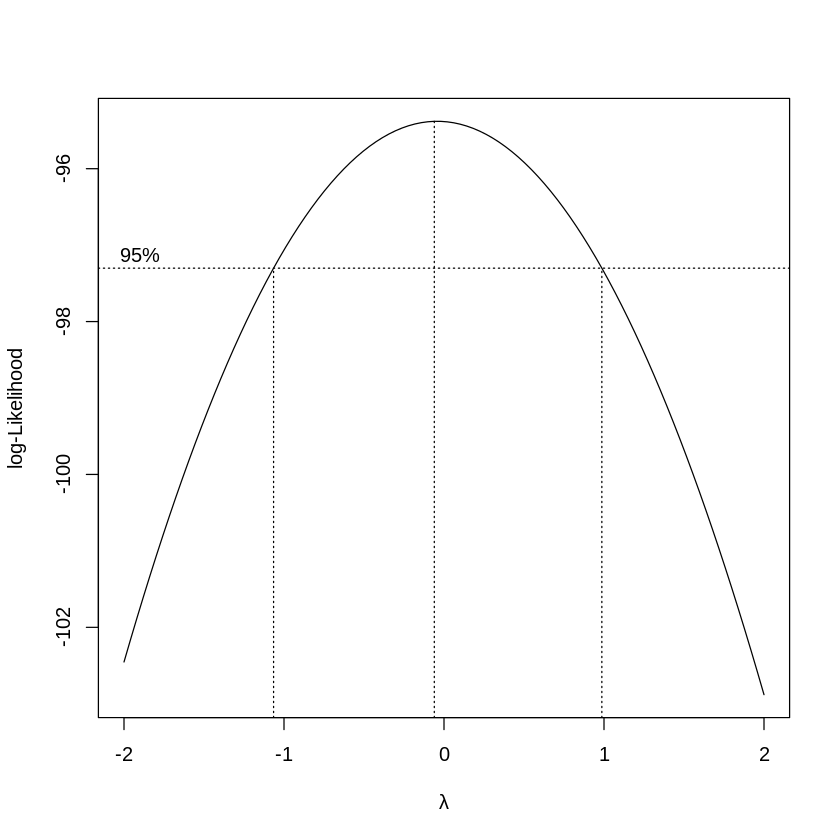

In [ ]:
# Transformação de Box-Cox
boxcox <- boxcox(lm(TaxaEmprego ~ AumentoSalarioMinimo, data = dados))
lambda <- boxcox$x[which.max(boxcox$y)]
dados$TaxaEmprego_transformada <- if(lambda == 0) log(dados$TaxaEmprego) else (dados$TaxaEmprego^lambda - 1) / lambda

# Criando um modelo de efeitos mistos para os dados transformados
modelo_nlme <- lme(fixed = TaxaEmprego_transformada ~ AumentoSalarioMinimo, random = ~ 1 | Regiao/Empresa, data = dados)
summary(modelo_nlme)

In [ ]:
# Prevendo os valores ajustados a partir do modelo transformado
dados$Ajuste_transformado <- predict(modelo_nlme)

# Revertendo os dados obtidos com Box-Cox para obter previsões na escala original
dados$Ajuste_Original <- if(lambda == 0) exp(dados$Ajuste_transformado) else (lambda * dados$Ajuste_transformado + 1)^(1 / lambda)

In [ ]:
# Observando a ANOVA
anova <- anova(modelo_nlme)
print(anova)

                     numDF denDF  F-value p-value
(Intercept)              1   199 53318.36  <.0001
AumentoSalarioMinimo     1   199    81.15  <.0001


In [ ]:
# Extraindo os resíduos transformados
residuos_transformados <- resid(modelo_nlme)

In [ ]:
# Teste de Shapiro-Wilk para a normalidade dos residuos transformados
shapiro_wilk <- shapiro.test(residuos_transformados)
print(shapiro_wilk)


	Shapiro-Wilk normality test

data:  residuos_transformados
W = 0.99097, p-value = 0.1258



In [ ]:
# Plotando os resíduos transformados vs Valores preditos
residuosxpreditos <- ggplot(data, aes(x = fitted(modelo_nlme), y = residuos_transformados)) +
  geom_point() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Resíduos x Valores preditos", x = "Valores preditos", y = "Resíduos")

# Q-Q plot dos resíduos
qq_plot_transformado <- ggqqplot(residuos_transformados, title = "Q-Q Plot dos resíduos")

# Boxplots dos resíduos por região e empresa
boxplot_região_tansformado <- ggplot(dados, aes(x = Regiao, y = residuos_transformados)) +
  geom_boxplot() +
  labs(title = "Boxplot dos resíduos por Região", x = "Região", y = "Resíduos")

boxplot_empresa_tansformado <- ggplot(dados, aes(x = Empresa, y = residuos_transformados)) +
  geom_boxplot() +
  labs(title = "Boxplot dos resíduos por Empresa", x = "Empresa", y = "Resíduos")

In [ ]:
# Teste de homocedasticidade de Levene
teste_levene_regiao <- leveneTest(residuos_transformados ~ Regiao, data = dados)
teste_levene_empresa <- leveneTest(residuos_transformados ~ Empresa, data = dados)
print(teste_levene_regiao)
print(teste_levene_empresa)

Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   9  0.8365 0.5831
      240               
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   4  1.9054 0.1101
      245               


# Plotando os resultados


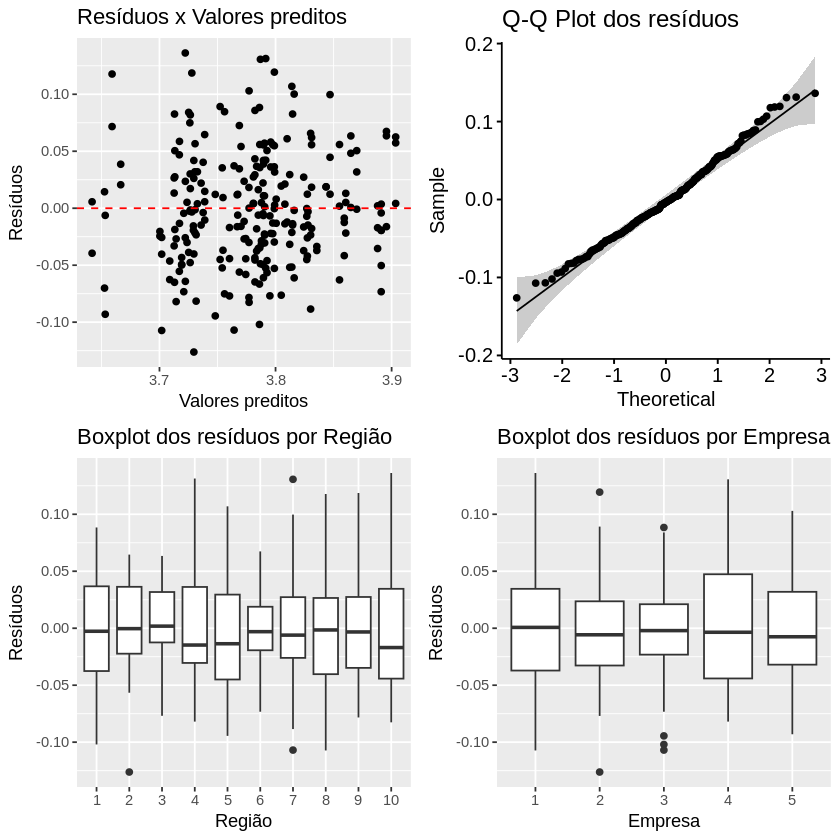

In [ ]:
# Plotando todos os gráficos para o modelo tarnsformado
ggarrange(
  residuosxpreditos, qq_plot_transformado,
  boxplot_região_tansformado, boxplot_empresa_tansformado,
  ncol = 2, nrow = 2
)

`geom_smooth()` using formula = 'y ~ x'


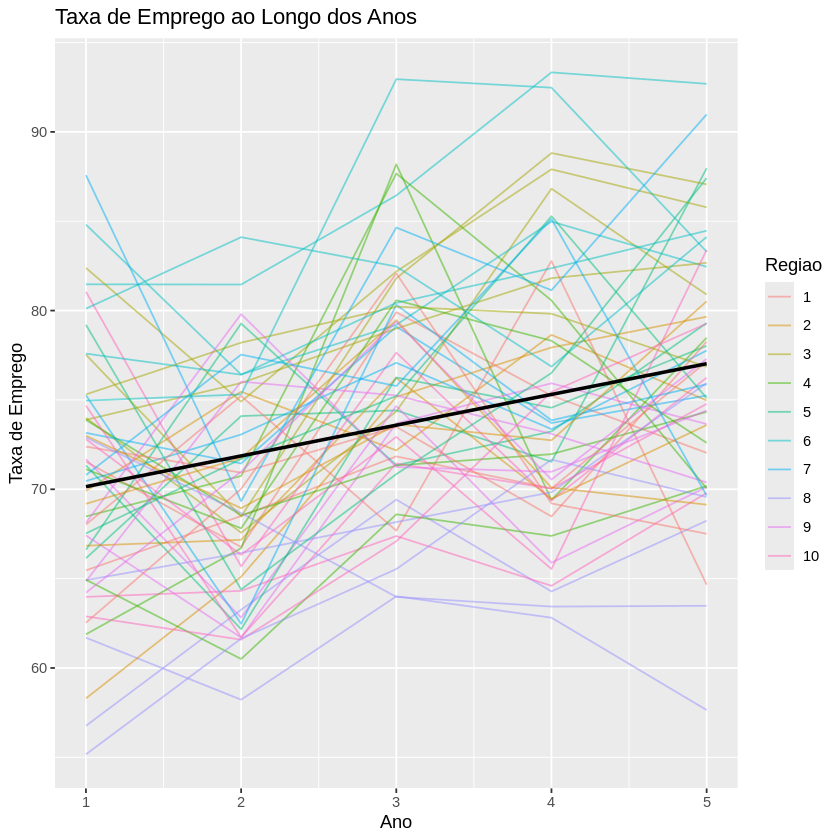

In [ ]:
# Plotando as taxas de emprego ao longo dos anos
ggplot(dados, aes(x = Ano, y = TaxaEmprego, color = Regiao)) +
  geom_line(aes(group = interaction(Regiao, Empresa)), alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Taxa de Emprego ao Longo dos Anos", x = "Ano", y = "Taxa de Emprego")

# Interpretação dos Resultados

## Efeitos fixos
O coeficiente de AumentoSalarioMinimo evidencia a mudança média na taxa de emprego devido à política

## Efeitos aleatórios
Os componentes de variância para Regiao e Empresa dentro da Regiao comprova a variabilidade nas taxas de emprego entre regiões e empresas